## Unsupervised Learning
Our goal is to construct a unsupervised model for indecating two independent stocks; the indicator would be including price or volume.
<tb>


### 1. Importing Data
- [quantmod](https://www.quantmod.com/examples/intro/) is quantitative financial Modeling and trading frameword for R
- We will use 'quantmod' package and getSymbols(##, from='yyyy-mm-dd') for importing data from google finance.
- Initially, we are going to download the historical data of Apple.inc's from 2010-01-04 to 2019-01-03,(10 years).




In [47]:
library(quantmod)
From <- '2010-01-04'
To <-'2019-01-04'

# getSymbols("AAPL", from = from, to = to)

let's take a look and understand about the data.

- As we see, we will get use of AAPL.Adjusted, the adjusted historical pricing from 2010-01-04. And AAPL.Volume will be used for later investigation.


- Then, we need to consider some other stocks that they might not share so similar feature in their business.
- To see the relation between AAPL's history price and some other not so correlated stocks' history price, i.e. _MCD_, _M_,_COST_,_BAC_.
- note we just want to see those data start from 2010 to recents
- note we need to awaked with using adjusted pricing.

In [69]:
get.stock.prices.data <- function(stock,from , to){
    symbol <- getSymbols(stock,from = From , to = To, src = 'yahoo' , auto.assign = F, warning = F)
    
#     data <- periodReturn(symbol, period = 'daily')
    data <- as.data.frame(symbol)[6]
    
    colnames(data) <- as.character(paste(stock,"Adjusted"))
    
    assign(stock,data, .GlobalEnv)
    
}

In [70]:
get.stock.prices.data('AAPL',From,To)
head(AAPL)

,AAPL Adjusted
2010-01-04,26.68133
2010-01-05,26.72746
2010-01-06,26.30233
2010-01-07,26.25370
2010-01-08,26.42825
2010-01-11,26.19511


In [71]:
# AAPL.Adjusted.price <- AAPL$AAPL.Adjusted
# head(APPL.Adjusted.price)
asset <- c('MCD','M','COST','BAC','AAPL')

# getSymbols(asset,from = from , to = to , src = 'yahoo')
# MCD.Adjusted.price <- MCD$MCD.Adjusted
# head(MCD.ADjusted.price)
# getSymbols('MCD',from = from,to = to)
# MCD.Adjusted.price <- MCD$MCD.Adjusted
# getSymbols('M',from = from,to = to)
# M.Adjusted.price <- M$M.Adjusted

# getSymbols('COST',from = from,to = to)
# COST.Adjusted.price <- COST$COST.Adjusted

# getSymbols('BAC',from = from,to = to)
# BAC.Adjusted.price <- BAC$BAC.Adjusted

for(stock in asset){
    get.stock.prices.data(stock,From,To)
}


We still need to see the summary of those set of data before we go stright to visualize those

In [72]:
AAPL_MCD <- data.frame(AAPL,MCD)
AAPL_M <- data.frame(AAPL,M)
AAPL_COST <- data.frame(AAPL,COST)
AAPL_BAC <- data.frame(AAPL,BAC)

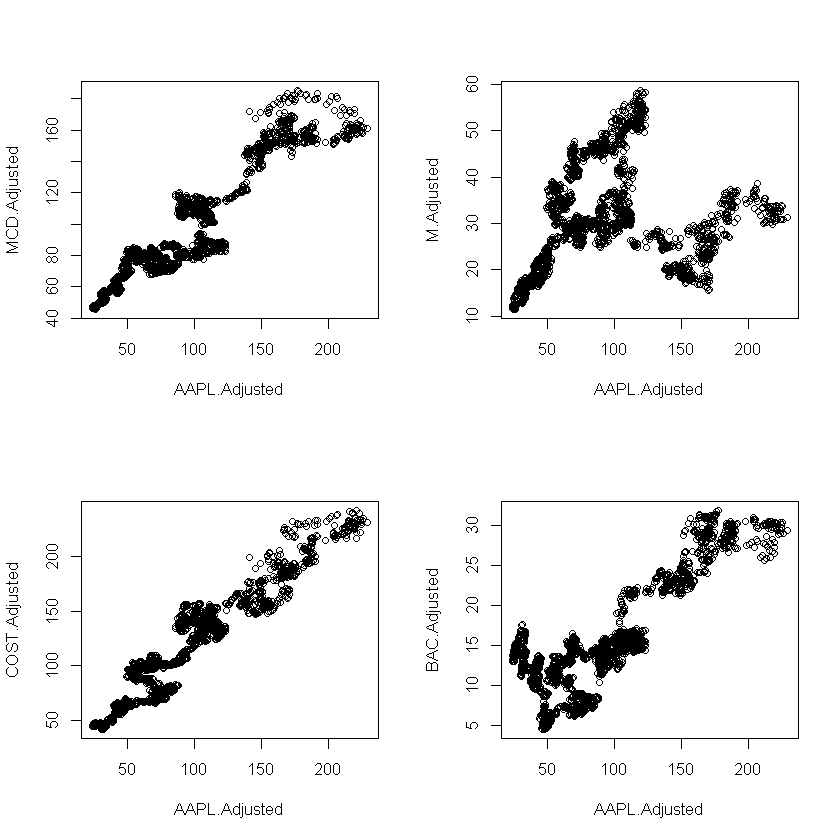

In [73]:
par(mfrow = c(2,2))
plot(AAPL_MCD)
plot(AAPL_M)
plot(AAPL_COST)
plot(AAPL_BAC)

### How about using trading volumn for indicator?
- initially, importing the data with those trading volumn.

In [5]:
AAPL.vol <- AAPL$AAPL.Volume
MCD.vol <- MCD$MCD.Volume
M.vol <- MCD$M.Volume
BAC.vol <- BAC$BAC.Volume
COST.vol <- COST$COST.Volume

In [6]:
# AAPL_M.vol <- data.frame(AAPL.vol,M.vol)
AAPL_MCD.vol <- data.frame(AAPL.vol,MCD.vol)
AAPL_BAC.vol <- data.frame(AAPL.vol,BAC.vol)
AAPL_COST.vol <- data.frame(AAPL.vol,COST.vol)

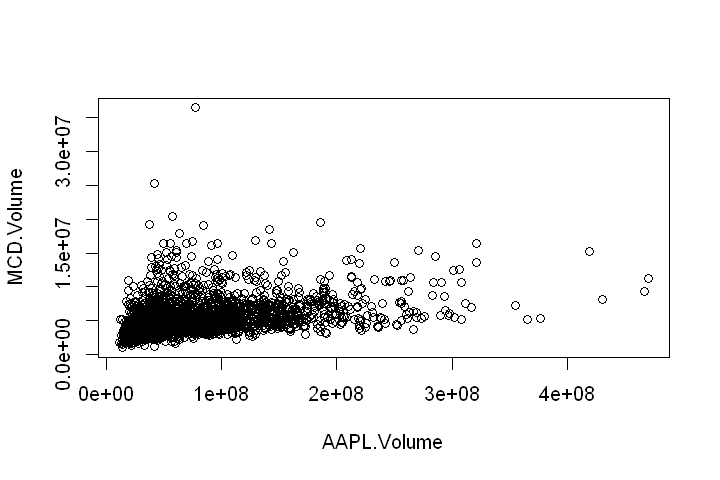

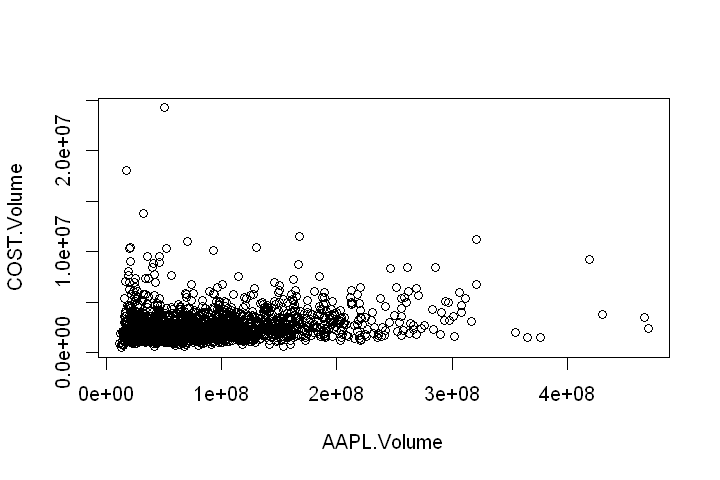

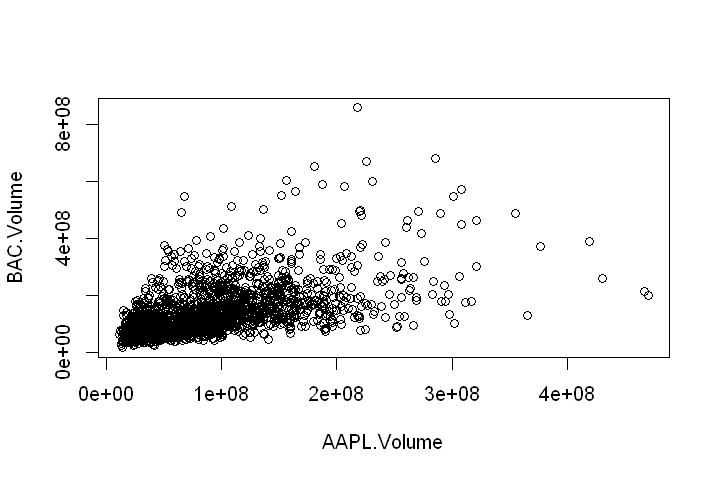

In [7]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(AAPL_MCD.vol)
# plot(AAPL_M.vol)
plot(AAPL_COST.vol)
plot(AAPL_BAC.vol)

### 2. Normalization

In term of understanding, the scalling of the data set does not unveil enough for doing Clustering. It comes that we need to normalizate them. There are two type of normalization:

- **Normailization** is the adjustment of each individually, while
- Feature normalization indicates that adjust each feature in the same way acorss all examples.

When we are normalize, we are actually adjusting the range of all features, So that the price between stocks with larger ranges will not be over-emphasised.

First, we should making our own *Normalized()* function : 

In [75]:
normalize <- function(x){
    num <- x - min(x)
    denorm <- max(x) - min(x)
    return (num/denorm)
}

In [76]:
## Normalize the AAPL's Adjusted price
AAPL.Adjust.norm <- normalize(AAPL)
## Normalize the M's Adjusted price
M.Adjusted.norm <- normalize(M)
## as.data.frame

MCD.Adjusted.norm<-normalize(MCD) ## MCD adjusted norm price

COST.Adjusted.norm <- normalize(COST) ## COST 

BAC.Adjusted.norm <- normalize(BAC)


# summary(AAPL.Adjust.norm.price)

# dim(AAPL.Adjust.norm.price)
# dim(M.Adjusted.norm.price)


### 3. After Normalization
 - Like what we have done, pairing two normalized stocks' price in a row. We are always let the AAPL's on the first axis.
 - Because, we are investigating whehter there's a factor for determining one stock's behaviors, by comparing other stocks' features.


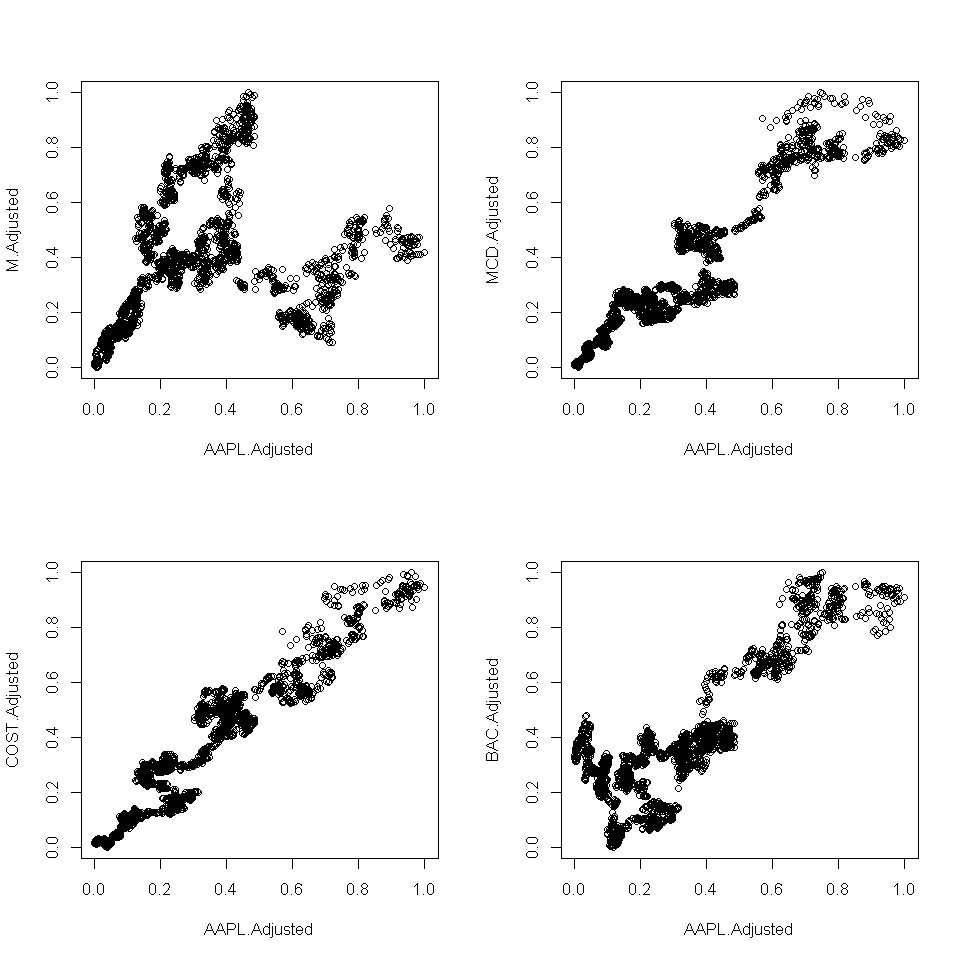

In [77]:
## visualize the normalized AAPL and M together
options(repr.plot.width=8, repr.plot.height=8)
AAPL_M.norm <- data.frame(AAPL.Adjust.norm,M.Adjusted.norm)

AAPL_MCD.norm <- data.frame(AAPL.Adjust.norm,MCD.Adjusted.norm) ## combine AAPL and MCD

AAPL_COST.norm <- data.frame(AAPL.Adjust.norm,COST.Adjusted.norm) ## dataFrame AAPL and COST

AAPL_BAC.norm <- data.frame(AAPL.Adjust.norm,BAC.Adjusted.norm)

par(mfrow = c(2,2))

plot(AAPL_M.norm)
plot(AAPL_MCD.norm)
plot(AAPL_COST.norm)
plot(AAPL_BAC.norm)


In [79]:
cor(AAPL_BAC.norm)
cor(AAPL_COST.norm)
cor(AAPL_M.norm)
cor(AAPL_MCD.norm)

,AAPL.Adjusted,BAC.Adjusted
AAPL.Adjusted,1.0000000,0.8511123
BAC.Adjusted,0.8511123,1.0000000


,AAPL.Adjusted,COST.Adjusted
AAPL.Adjusted,1.0000000,0.9559307
COST.Adjusted,0.9559307,1.0000000


,AAPL.Adjusted,M.Adjusted
AAPL.Adjusted,1.0000000,0.2319174
M.Adjusted,0.2319174,1.0000000


,AAPL.Adjusted,MCD.Adjusted
AAPL.Adjusted,1.0000000,0.9305899
MCD.Adjusted,0.9305899,1.0000000


## 4. Discussion(part 1)

- By looking at those scatter plots, we notice those data points are not randomly distributed within the normalized scale.Specially,the correlation between each considered stock prices with AAPL are high (one exception, the Macy's price).
- That makes the clustering or classicating no sense.

How about, we are looking at the linear return(or Log return) of each stocks' prices. 

In [83]:
daily_stock_returns <- function(stock,from,to){
    symbol <- getSymbols(stock,from = From , to = To, src = 'yahoo' , auto.assign = F, warning = F)
    
    data <- periodReturn(symbol, period = 'daily')
#     data <- as.data.frame(symbol)[6]
    
    colnames(data) <- as.character(paste(stock,"Linrtn"))
    
    assign(stock,data,.GlobalEnv)
    
}

In [84]:
for (stock in asset) {
    daily_stock_returns(stock)
}

In [22]:
# calculate the linear return series for AAPL' price
AAPL_Linrtn <- diff(AAPL.Adjusted.price)/AAPL.Adjusted.price[-length(AAPL.Adjusted.price)]

# calculate the linear return series for COST' price
COST_Linrtn <- diff(COST.Adjusted.price)/COST.Adjusted.price[-length(COST.Adjusted.price)]

# calculate the linear return series for BAC' price
BAC_Linrtn <- diff(BAC.Adjusted.price)/BAC.Adjusted.price[-length(COST.Adjusted.price)]

# calculate the linear return series for MCD' price
MCD_Linrtn <- diff(MCD.Adjusted.price)/MCD.Adjusted.price[-length(MCD.Adjusted.price)]


ERROR: Error in diff(AAPL.Adjusted.price): object 'AAPL.Adjusted.price' not found


In [85]:
AAPL

             AAPL Linrtn
2010-01-04  2.717514e-03
2010-01-05  1.728854e-03
2010-01-06 -1.590631e-02
2010-01-07 -1.848595e-03
2010-01-08  6.648338e-03
2010-01-11 -8.821591e-03
2010-01-12 -1.137501e-02
2010-01-13  1.410551e-02
2010-01-14 -5.791607e-03
2010-01-15 -1.671203e-02
2010-01-19  4.423831e-02
2010-01-20 -1.539245e-02
2010-01-21 -1.728619e-02
2010-01-22 -4.959867e-02
2010-01-25  2.690265e-02
2010-01-26  1.413306e-02
2010-01-27  9.420258e-03
2010-01-28 -4.132199e-02
2010-01-29 -3.627875e-02
2010-02-01  1.390188e-02
2010-02-02  5.802922e-03
2010-02-03  1.720615e-02
2010-02-04 -3.603870e-02
2010-02-05  1.775576e-02
2010-02-08 -6.855638e-03
2010-02-09  1.066353e-02
2010-02-10 -5.453856e-03
2010-02-11  1.819386e-02
2010-02-12  8.607213e-03
2010-02-16  1.507138e-02
2010-02-17 -4.178904e-03
2010-02-18  1.876055e-03
2010-02-19 -6.209072e-03
2010-02-22 -6.198230e-03
2010-02-23 -1.676479e-02
2010-02-24  1.826856e-02
2010-02-25  6.677978e-03
2010-02-26  1.297027e-02
2010-03-01  2.135671e-02


In [86]:
## Combining them into a data.frame
my_data <- data.frame(AAPL,COST,BAC,MCD)

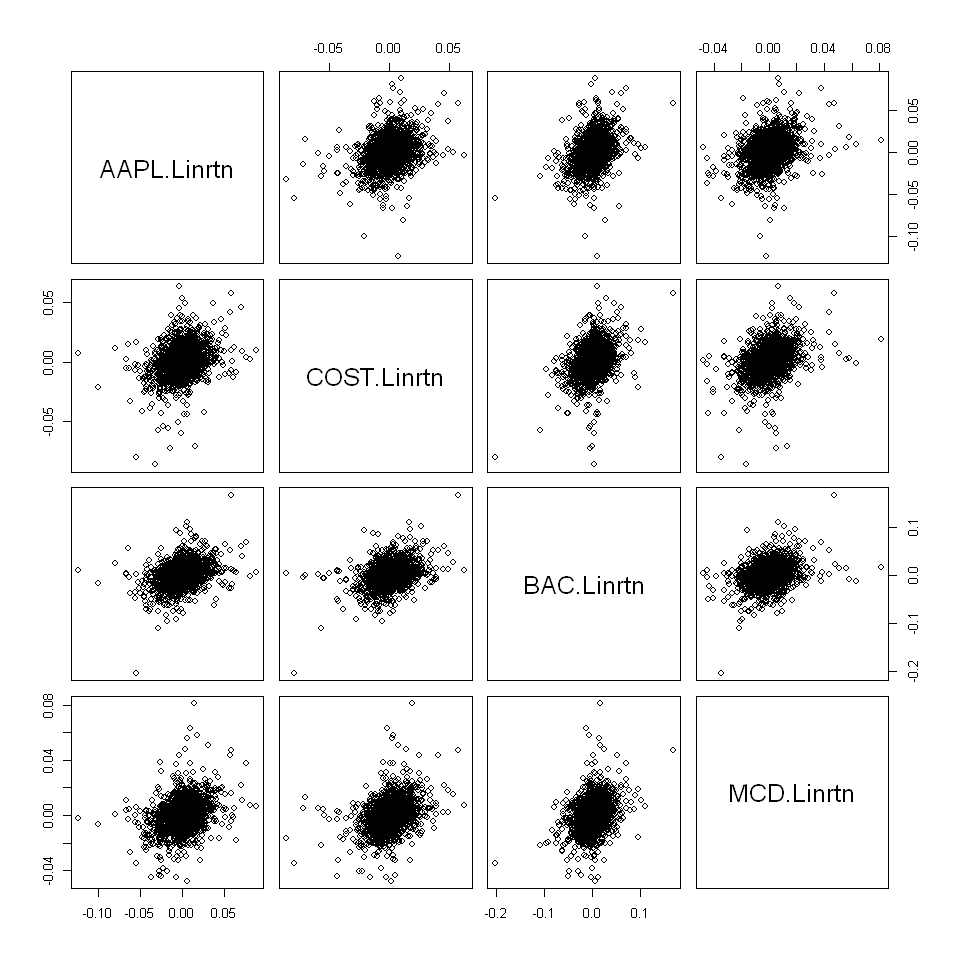

In [87]:
plot(my_data)

By looking at these plot, we don't see some clear linear patten. Might be it is time to try clustering them base one the linear return features.

In [5]:
## Library for working on clustering
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

ERROR: Error in library(factoextra): there is no package called 'factoextra'


In [6]:
install.packages("factoextra")

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


#### Clustering Distance Measures
The classification of observations into groups requires some methods for computing the distance or the (dis)similarity between each pair of observations. The result of this computation is known as a dissimilarity or distance matrix. There are many methods to calculate this distance information; the choice of distance measures is a critical step in clustering. It defines how the similarity of two elements (x, y) is calculated and it will influence the shape of the clusters.

The choice of distance measures is a critical step in clustering. It defines how the similarity of two elements (x, y) is calculated and it will influence the shape of the clusters. The classical methods for distance measures are Euclidean and Manhattan distances,

In [103]:
distance <- get_dist(my_data)
# distance

ERROR: Error in get_dist(my_data): could not find function "get_dist"


In [89]:
my_data <- na.omit(my_data)
head(my_data)

,AAPL.Linrtn,COST.Linrtn,BAC.Linrtn,MCD.Linrtn
2010-01-04,0.002717514,0.004735312,0.029527559,0.0023949864
2010-01-05,0.001728854,-0.003029793,0.032504844,-0.0076457472
2010-01-06,-0.015906307,0.013000169,0.011728271,-0.0136436278
2010-01-07,-0.001848595,-0.004833350,0.032946982,0.0073230430
2010-01-08,0.006648338,-0.007201474,-0.008859953,-0.0009693376
2010-01-11,-0.008821591,0.001180820,0.008939153,0.0077619664


In [90]:
## Want the depending feactors on the col
## Transform the data.frame, t()|
my_data<-t(my_data)

In [95]:
k2 <- kmeans(my_data, centers = 2, nstart = 5)
str(k2)

List of 9
 $ cluster     : Named int [1:4] 2 2 1 2
  ..- attr(*, "names")= chr [1:4] "AAPL.Linrtn" "COST.Linrtn" "BAC.Linrtn" "MCD.Linrtn"
 $ centers     : num [1:2, 1:2266] 0.02953 0.00328 0.0325 -0.00298 0.01173 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:2266] "2010-01-04" "2010-01-05" "2010-01-06" "2010-01-07" ...
 $ totss       : num 1.12
 $ withinss    : num [1:2] 0 0.53
 $ tot.withinss: num 0.53
 $ betweenss   : num 0.594
 $ size        : int [1:2] 1 3
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [94]:
# visilize
fviz_cluster(k2, data = my_data)

ERROR: Error in fviz_cluster(k2, data = my_data): could not find function "fviz_cluster"
